# Sucess Chance in Range

A success gateway. The value is generated inside a range, but all values at or below the goal are rejected.

This is a common scheme, for example to handle combat dificulty.

Having:

- A range of values with the same chance (die roll)
- A value to surpass

We want to know:

- The chance of success

## Setup

In [1]:
import pandas as pd
import math

from scripts.probability import success_chance

## Example: Roll 1d6 Against a Target

Having

- A six side die
- A target value

We want to know:

- The chances of going above or below the target value

### Roll Ranges

In [2]:
d = {"value": [1, 2, 3, 4, 5, 6]}
df = pd.DataFrame(data=d)

In [3]:
df["chance_above"] = df.apply(lambda x: success_chance(1, 6, x["value"], above=True, equal=False), axis=1)
df["chance_above_equal"] = df.apply(lambda x: success_chance(1, 6, x["value"], above=True, equal=True), axis=1)
df["chance_below"] = df.apply(lambda x: success_chance(1, 6, x["value"], above=False, equal=False), axis=1)
df["chance_below_equal"] = df.apply(lambda x: success_chance(1, 6, x["value"], above=False, equal=True), axis=1)

In [4]:
df["chance_above"] = pd.to_numeric(df["chance_above"])
df["chance_above_equal"] = pd.to_numeric(df["chance_above_equal"])
df["chance_below"] = pd.to_numeric(df["chance_below"])
df["chance_below_equal"] = pd.to_numeric(df["chance_below_equal"])

In [5]:
df

,value,chance_above,chance_above_equal,chance_below,chance_below_equal
0,1,0.833333,1.000000,0.000000,0.166667
1,2,0.666667,0.833333,0.166667,0.333333
2,3,0.500000,0.666667,0.333333,0.500000
3,4,0.333333,0.500000,0.500000,0.666667
4,5,0.166667,0.333333,0.666667,0.833333
5,6,0.000000,0.166667,0.833333,1.000000


Text(0, 0.5, 'Chance')

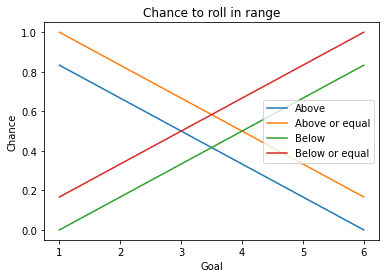

In [6]:
ax = df.plot(title="Chance to roll in range", x="value")
ax.legend(["Above", "Above or equal", "Below", "Below or equal"])
ax.set_xlabel("Goal")
ax.set_ylabel("Chance")

### Normalized to Zero

In [7]:
d = {"value": [0, 1, 2, 3, 4, 5]}
df = pd.DataFrame(data=d)

In [8]:
df["chance_above"] = df.apply(lambda x: success_chance(0, 5, x["value"], above=True, equal=False), axis=1)
df["chance_above_equal"] = df.apply(lambda x: success_chance(0, 5, x["value"], above=True, equal=True), axis=1)
df["chance_below"] = df.apply(lambda x: success_chance(0, 5, x["value"], above=False, equal=False), axis=1)
df["chance_below_equal"] = df.apply(lambda x: success_chance(0, 5, x["value"], above=False, equal=True), axis=1)

In [9]:
df["chance_above"] = pd.to_numeric(df["chance_above"])
df["chance_above_equal"] = pd.to_numeric(df["chance_above_equal"])
df["chance_below"] = pd.to_numeric(df["chance_below"])
df["chance_below_equal"] = pd.to_numeric(df["chance_below_equal"])

In [10]:
df

,value,chance_above,chance_above_equal,chance_below,chance_below_equal
0,0,0.833333,1.000000,0.000000,0.166667
1,1,0.666667,0.833333,0.166667,0.333333
2,2,0.500000,0.666667,0.333333,0.500000
3,3,0.333333,0.500000,0.500000,0.666667
4,4,0.166667,0.333333,0.666667,0.833333
5,5,0.000000,0.166667,0.833333,1.000000


Text(0, 0.5, 'Chance')

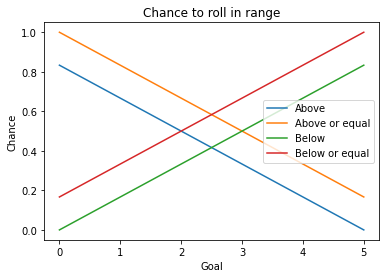

In [11]:
ax = df.plot(title="Chance to roll in range", x="value")
ax.legend(["Above", "Above or equal", "Below", "Below or equal"])
ax.set_xlabel("Goal")
ax.set_ylabel("Chance")

## Example: X-Com Chance to Damage

After a successful hit, before applying damage, a damage gateway is applied. The range of success is also used to define the final damage, but that is not taken into account here.

Having:

- A random value between 0 and 40
- Enemy with armor 25

We want to know:

- The chance to damage

In [12]:
success_chance(0, 40, 25, above=True, equal=False)

Decimal('0.3658536585365853658536585366')